In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt

# ipywidgets used to interact with graphs
from ipywidgets import interact

# Increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use('fivethirtyeight')

# This makes sure that graphs render in your notebook
%matplotlib inline

# HOUSING DATA - multiple plots

In [2]:
housing = pd.read_csv('./data/housing.csv')

housing = housing.dropna()
housing['ocean_proximity'] = housing.ocean_proximity.map({'<1H OCEAN':0, 'INLAND':1, 'NEAR OCEAN':2, 'NEAR BAY':3, 'ISLAND':4})

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [3]:
housing.shape

(20433, 10)

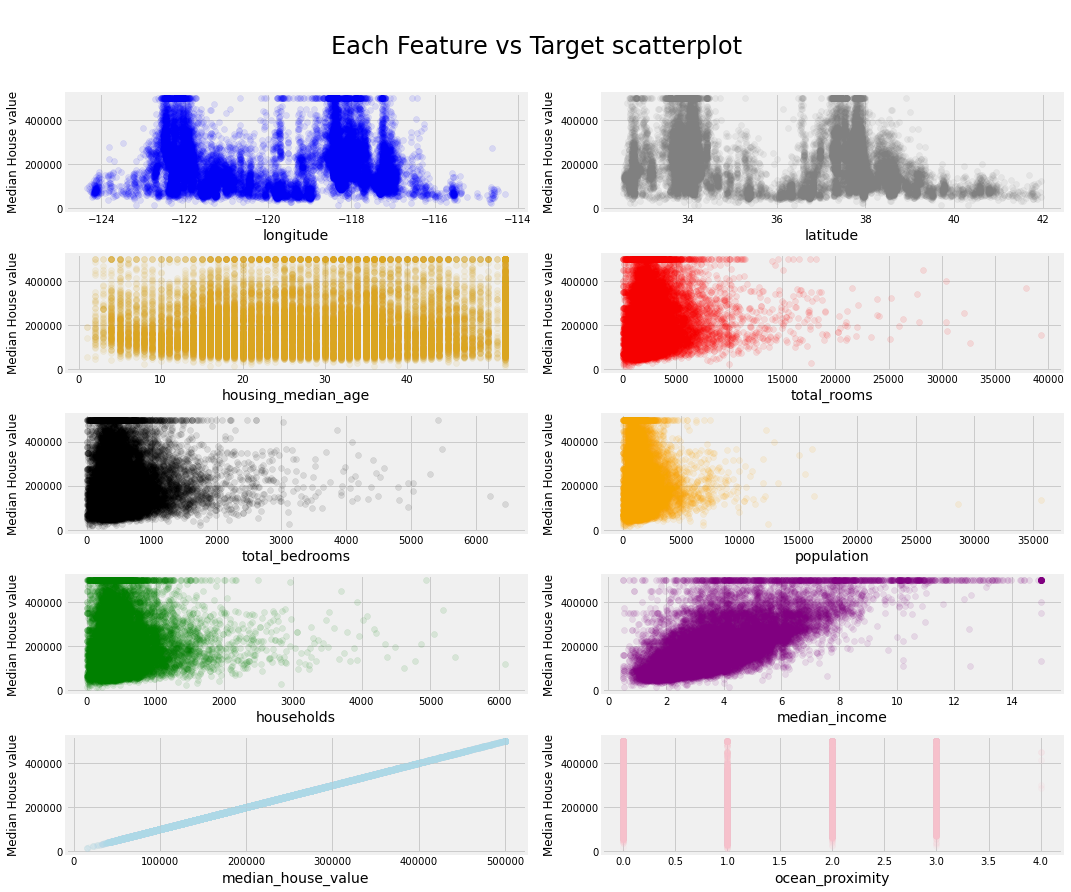

In [4]:
# Generate all feature vs target ('median_house_value') scatterplots
# 'median_income' has most linear relationship with target variable

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))

color_choices = ['blue', 'grey', 'goldenrod', 'r', 'black', 'orange', 'g', 'purple', 'lightblue', 'pink']

plt.subplots_adjust(wspace=0.3, hspace=0.3)

# function turns matrix to vector
ax = ax.ravel()

for i, column in enumerate(housing.columns):
    ax[i].scatter(housing[column], housing['median_house_value'], color=color_choices[i % len(color_choices)], alpha=0.1)
    ax[i].set_ylabel("Median House value", fontsize=12)
    ax[i].set_xlabel(column, fontsize=14)
    
fig.suptitle("\nEach Feature vs Target scatterplot", size=24)
fig.tight_layout()
fig.subplots_adjust(bottom=0, top=0.88)
plt.show();

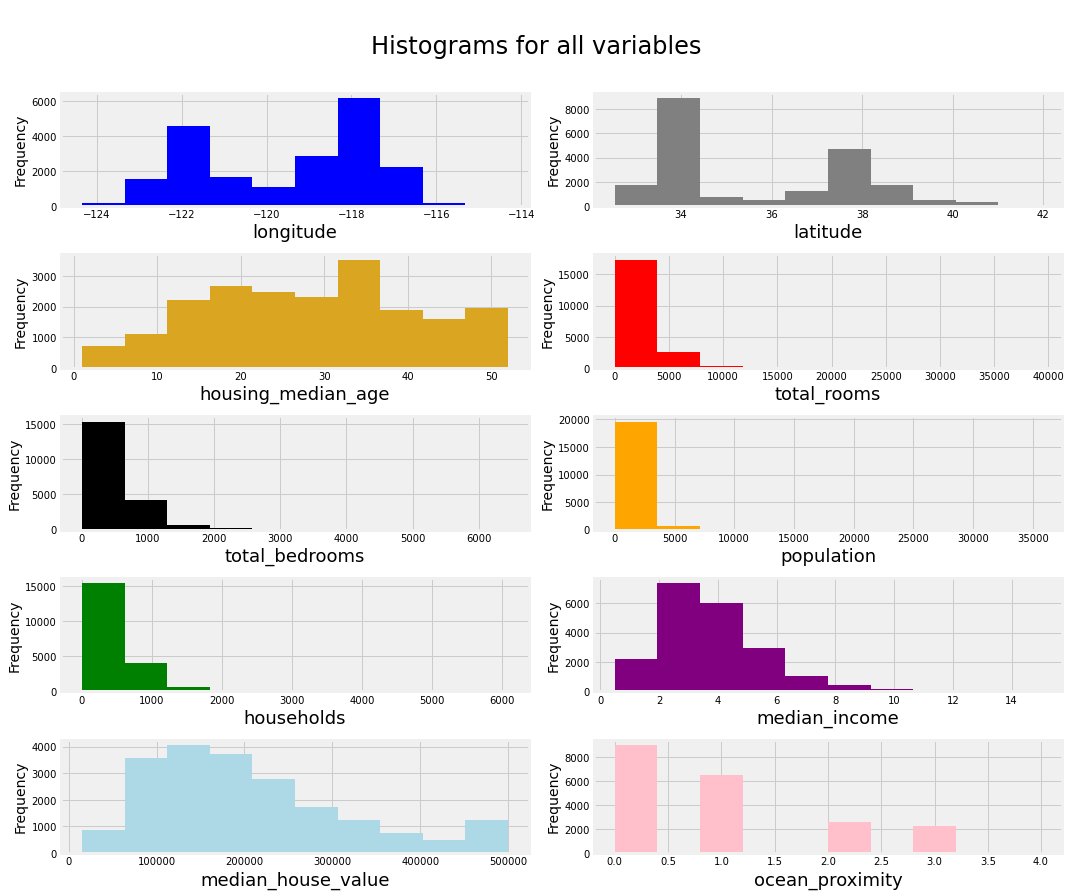

In [5]:
# Generate histograms for all variables in dataset
# Note that 'median_income' and 'mmedian_house_value' have similar shape - could be highly correlated

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))

color_choices = ['blue', 'grey', 'goldenrod', 'r', 'black', 'orange', 'g', 'purple', 'lightblue', 'pink']

# function turns matrix to vector
ax = ax.ravel()

for i, column in enumerate(housing.columns):
    ax[i].hist(housing[column], color=color_choices[i % len(color_choices)], alpha=1)
    #ax[i].set_title(f'{housing[column].name}', fontsize=18)
    ax[i].set_ylabel("Frequency", fontsize=14)
    ax[i].set_xlabel(column, fontsize=18)
    
fig.suptitle("\nHistograms for all variables", size=24)
fig.tight_layout()
fig.subplots_adjust(bottom=0, top=0.88)
plt.show();

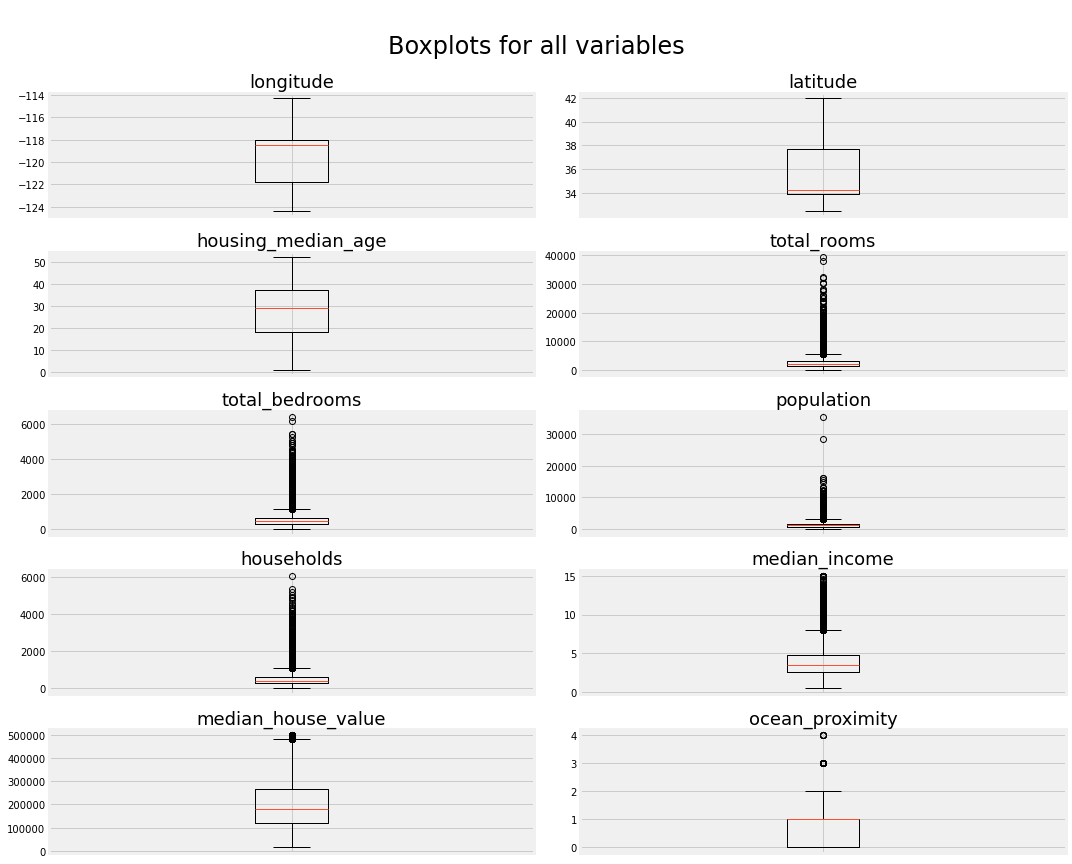

In [6]:
# Generate boxplots to identify outliers
# 'total_rooms' 'total_bedrooms' 'population', 'households' and 'median_income' all have a lot of outliers...

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# function turns matrix to vector
ax = ax.ravel()

for i, column in enumerate(housing.columns):
    ax[i].boxplot(housing[column])
    ax[i].set_title(f'{housing[column].name}', fontsize=18)
    ax[i].set_ylabel("", fontsize=14)
    ax[i].set_xlabel("", fontsize=14)
    ax[i].tick_params(labelbottom=False)
    
fig.suptitle("\nBoxplots for all variables", size=24)
fig.tight_layout()
fig.subplots_adjust(bottom=0, top=0.88)
plt.show();

In [8]:
# Re-load data with ocean_proximity
ocean = pd.read_csv('./data/housing.csv')
ocean = ocean.dropna()

ocean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
# Group by ocean proximity to find mean value for median house price
d1 = ocean.groupby('ocean_proximity')['median_house_value'].agg([np.mean])
d1.columns = ['mean_value']

d1.head()

,mean_value
ocean_proximity,
<1H OCEAN,240267.990812
INLAND,124896.863147
ISLAND,380440.000000
NEAR BAY,259279.292070
NEAR OCEAN,249042.355023


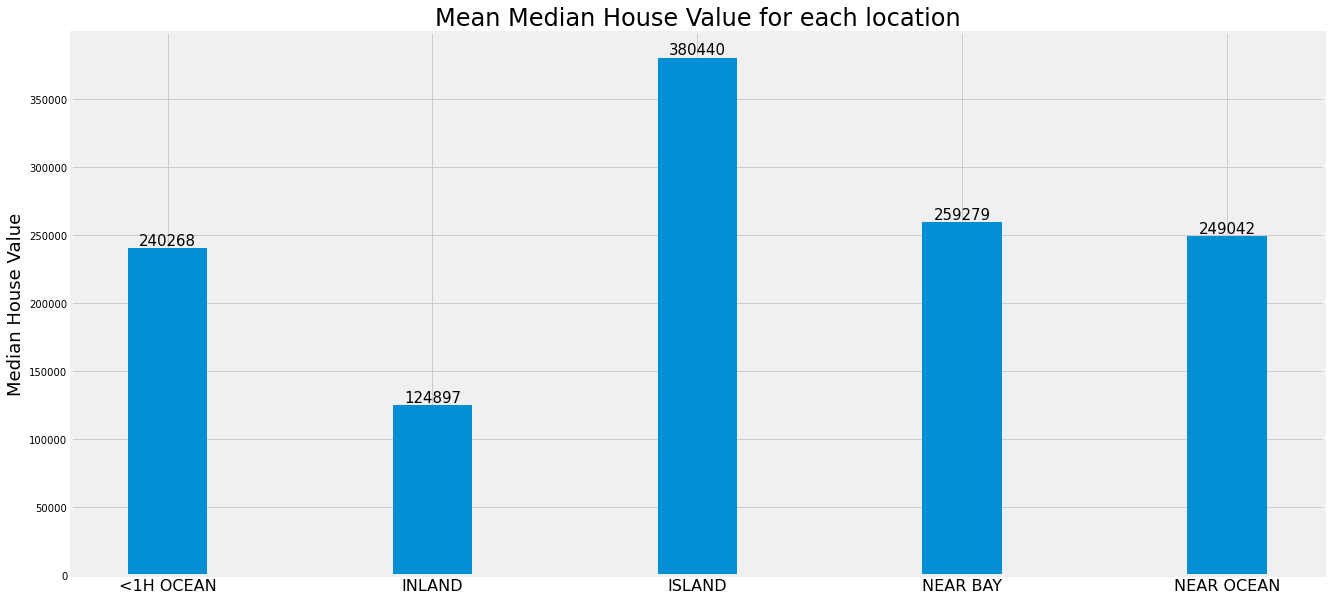

In [10]:
# Generate single bar plot for mean house value per ocean proximity label

# Add figure and increase size
plt.figure(figsize=(20, 10))
plt.bar(d1.index, d1['mean_value'], width=0.3)

for i, val in enumerate(d1['mean_value'].values):
    plt.text(i, val, round(float(val)), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size': 15})
    

plt.gca().set_xticks(d1.index)
plt.gca().set_xticklabels(d1.index, fontdict={'size': 16})
plt.title("Mean Median House Value for each location", fontsize=24)
plt.ylabel("Median House Value", fontsize=18)
plt.show();

In [11]:
# It looks like ocean proximity does affect house price, with greater value as you get closer to water

# CHURN DATA - examples of Seaborn

In [12]:
churn = pd.read_csv('./data/Churn_Modelling.csv')

churn = churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
d2 = churn.groupby('Age')['EstimatedSalary'].agg([np.mean])
d2.columns = ['mean_estimated_salary']
d2.head()

,mean_estimated_salary
Age,
18,85102.389545
19,97734.100370
20,97705.542000
21,102536.673774
22,98321.615476


<AxesSubplot:xlabel='Age', ylabel='mean_estimated_salary'>

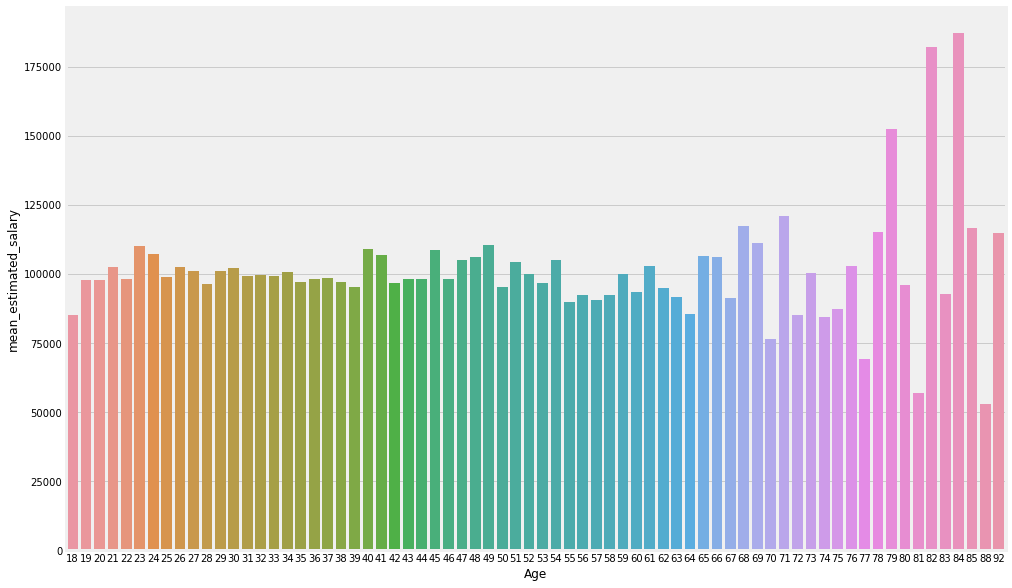

In [32]:
# Use Seaborn to plot bars signifying mean estimated salary against age
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,10))

sns.barplot(x=d2.index, y='mean_estimated_salary', data=d3, ax=ax)

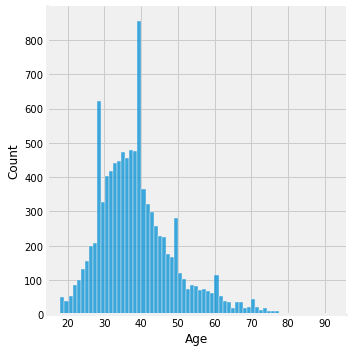

In [65]:
# Seaborn prefers displot() when generating histograms
# Use discrete=True to smooth out the gaps data
sns.displot(churn, x="Age", kind='hist')

<AxesSubplot:xlabel='Age', ylabel='Count'>

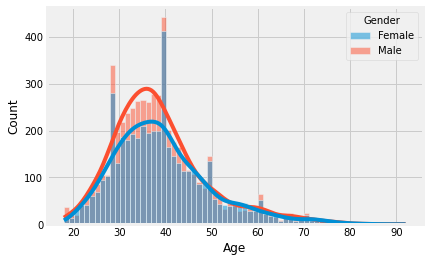

In [68]:
sns.histplot(churn, x='Age', hue='Gender', kde=True)

In [62]:
# Use range of Age values to calculate no of bins
churn.Age.sort_values().values

array([18, 18, 18, ..., 88, 92, 92], dtype=int64)

# Property Tax Report - pie chart

In [57]:
tax = pd.read_csv('./data/property_report.csv')

In [41]:
cols = ['PID', 'LEGAL_TYPE', 'ZONE_CATEGORY', 'CURRENT_LAND_VALUE', 'CURRENT_IMPROVEMENT_VALUE', 'TAX_ASSESSMENT_YEAR', 'YEAR_BUILT', 'TAX_LEVY', 'NEIGHBOURHOOD_CODE']

In [58]:
df = tax[cols]
df = df.drop(['YEAR_BUILT'], axis=1)
df = df.dropna()

df.head()

,PID,LEGAL_TYPE,ZONE_CATEGORY,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE
0,024-363-715,LAND,Multiple Family Dwelling,7200000.0,43600.0,2016.0,19625.26,14
1,010-562-559,LAND,Multiple Family Dwelling,3779000.0,989000.0,2016.0,15488.91,14
2,024-029-785,STRATA,Comprehensive Development,196000.0,154000.0,2016.0,1107.98,26
3,014-814-480,LAND,One Family Dwelling,932000.0,28300.0,2016.0,3068.76,19
4,013-016-024,LAND,One Family Dwelling,946000.0,15300.0,2016.0,4355.34,23


In [59]:
df['ZONE_CATEGORY'].value_counts()

One Family Dwelling          68045
Comprehensive Development    64904
Multiple Family Dwelling     27237
Commercial                   17318
Two Family Dwelling          14596
Light Industrial              2869
Historic Area                 2332
Industrial                    1227
Limited Agricultural           163
Name: ZONE_CATEGORY, dtype: int64

In [53]:
# Group by 'ZONE_CATEGORY' and aggregate based on 'PID' to count no of properties for each zone
df_zones = df.groupby('ZONE_CATEGORY', as_index=False)['PID'].count().rename(columns={'PID' : 'no_of_properties'})

# Count total number of properties
total_properties = df_zones['no_of_properties'].sum()

# Calculate percentage share in each zone for the number of properties out of the total number of properties
df_zones['percentage_of_properties'] = ((df_zones['no_of_properties'] / total_properties) * 100)

df_zones

,ZONE_CATEGORY,no_of_properties,percentage_of_properties
0,Commercial,17318,8.716047
1,Comprehensive Development,64904,32.665798
2,Historic Area,2332,1.173682
3,Industrial,1227,0.617542
4,Light Industrial,2869,1.443951
5,Limited Agricultural,163,0.082037
6,Multiple Family Dwelling,27237,13.708220
7,One Family Dwelling,68045,34.246644
8,Two Family Dwelling,14596,7.346080


Text(0.5, 1.0, 'Top-5 zone categories with the highest percentage\nshare in the total number of properties')

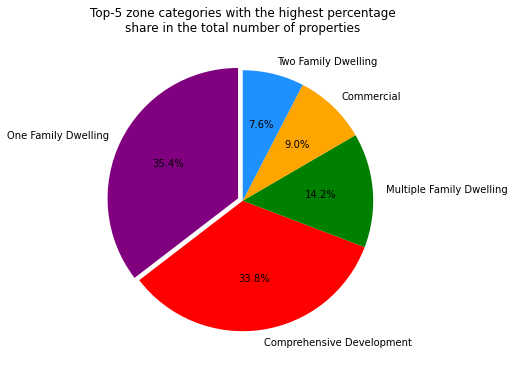

In [56]:
# Find the zones with the top-5 percentage share in the total number of properties
df_top_zones = df_zones.nlargest(columns='percentage_of_properties', n=5)

# Change the size of the figure (in inches)
plt.figure(figsize=(8, 6))

# Slices: percentage_of_properties
slices = df_top_zones['percentage_of_properties']
# Categories: ZONE_CATEGORY
categories = df_top_zones['ZONE_CATEGORY']
# For different colors: https://matplotlib.org/examples/color/named_colors.html
colors_col = ['purple', 'red', 'green', 'orange', 'dodgerblue']

# Plot the pie-chart:
# Use shadow = True if you want shadow underneath pie chart for 3D-effect
# To drag a slice away from the centre of the plot use explode parameter
# To display the percentage in slice use Python string formatting in autopct parameter
plt.pie(slices, labels=categories, colors=colors_col, startangle=90, explode=(0.040, 0, 0, 0, 0), autopct='%1.1f%%')

# Title of the plot
plt.title('Top-5 zone categories with the highest percentage\nshare in the total number of properties', fontsize=12)